# 準備

In [1]:
import warnings
warnings.simplefilter('ignore')

# ライブラリのインポート
import pandas as pd
import pickle as pkl
from pdpbox import pdp, info_plots

In [2]:
# データ、モデルの読み込み
train = pd.read_csv('train_proc.csv')
with open('lgbm_model.pkl', 'rb') as f:
    model = pkl.load(f) 

# PDPboxの実行

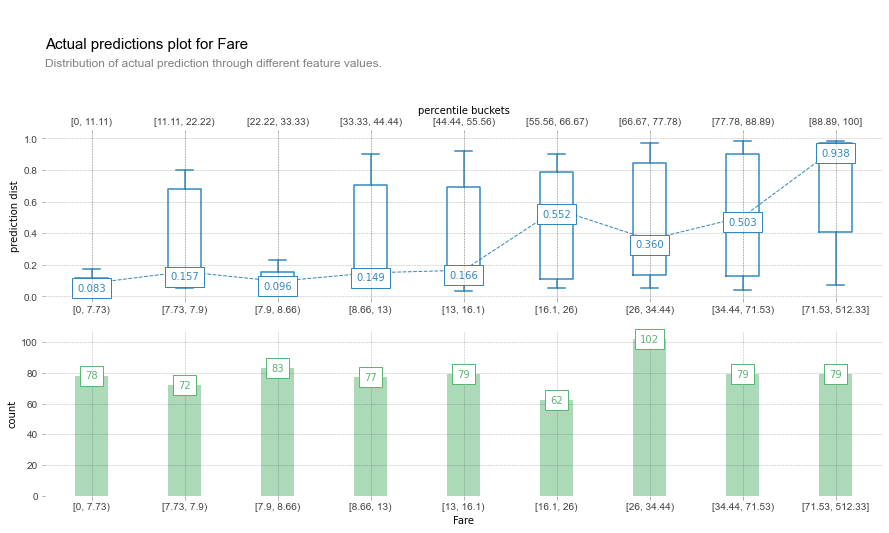

In [3]:
# PDPboxによる特徴量Fareに対するLightGBMモデルのSurvived予測の変化
fig, axes, summary_df = info_plots.actual_plot(model= model, X=train[model.feature_name_], 
                                               feature='Fare', feature_name='Fare',
                                               show_percentile=True, predict_kwds={})
# fig.savefig('titanic_pdpbox_actualplot_fare.png', bbox_inches='tight')

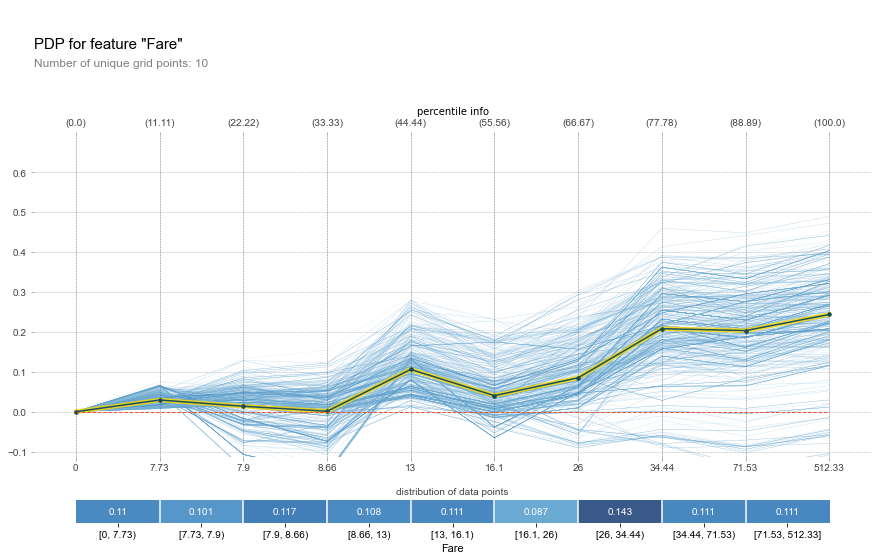

In [4]:
# PDPboxによる特徴量Fareに対するLightGBMモデルのSurvived予測の変化（ICE）
pdp_fare = pdp.pdp_isolate(model=model, dataset=train, model_features= model.feature_name_, 
                           feature='Fare', predict_kwds={})
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True, 
                         show_percentile=True, plot_lines=True, plot_pts_dist=True)
# fig.savefig('titanic_pdpbox_ice_fare.png', bbox_inches='tight')

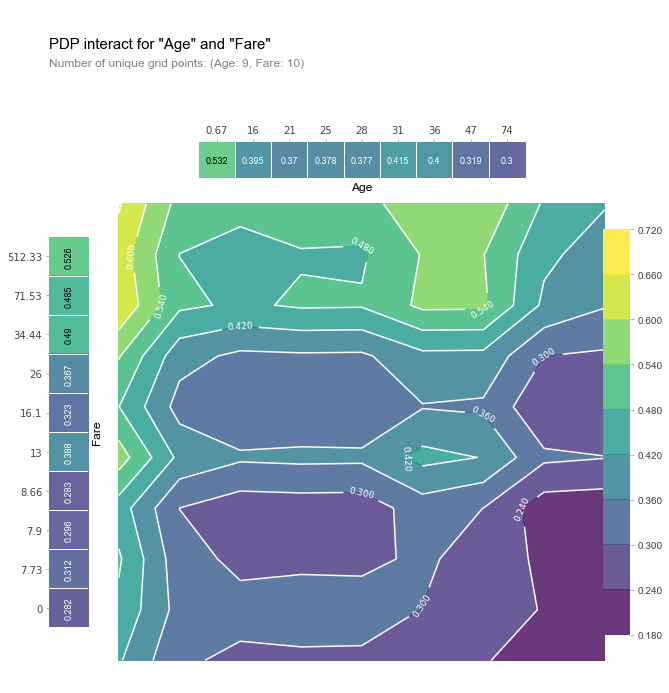

In [5]:
# PDPboxによる特徴量FareとAgeの組み合わせに対するLightGBMモデルのSurvived予測の変化
interact_age_fare = pdp.pdp_interact(model=model, dataset=train, model_features=model.feature_name_, 
                                     features=['Age','Fare'], predict_kwds={})
fig, axes = pdp.pdp_interact_plot(pdp_interact_out=interact_age_fare, feature_names=['Age','Fare'], 
                                  plot_type='contour', x_quantile=True, plot_pdp=True)
# fig.savefig('titanic_pdpbox_pdp_contour_age_fare.png', bbox_inches='tight')

<br>